In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.1


In [2]:
# Imports
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

C:\Users\Thayla\AppData\Local\Temp\ipykernel_15968\180794985.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Carregando os dados
train = pd.read_csv('train.csv')
x_test = pd.read_csv('test.csv')


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
train.isnull().values.any()

False

In [8]:
# Verificando valores nulos
x_test.isnull().values.any()

False

In [9]:
# Separate features and target
x = train.drop(columns=['ID','TARGET'],axis=1)
y = train['TARGET']

In [10]:
# Retirando a coluna ID
x_test = x_test.drop(columns=['ID'], axis=1)

In [11]:
# Split em dados de treino e teste com amostragem estratificada
X_treino,X_teste,y_treino,y_teste = train_test_split(x,
                                                     y,
                                                     test_size=0.25,
                                                     random_state=1234)

In [12]:
X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape

((57015, 369), (19005, 369), (57015,), (19005,))

## Balanceamento de Classe

In [13]:
y_treino.value_counts()

TARGET
0    54749
1     2266
Name: count, dtype: int64

In [14]:
# Carregar a função SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [15]:
# Vamos aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
sm = SMOTE(k_neighbors=2)

In [16]:
X_res,y_res = sm.fit_resample(X_treino,y_treino)

In [17]:
y_res.value_counts()

TARGET
0    54749
1    54749
Name: count, dtype: int64

In [18]:
# Ajustando o nome dos datasets de treino
X_treino = X_res
y_treino = y_res

## Padronização dos Dados

In [26]:
X_treino.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130779.000000
1,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129911.970000
2,2,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175460.580000
3,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
4,2,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [40]:
# Padronização
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [44]:
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_test_normalized = sc.transform(X_teste)

## Modelo 1: Regressão Logística

In [45]:
# Lista de hiperparametros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [46]:
# GridSearch: criação de vários modelos com combinações diferentes de hiperparamentros
modelo_v1 = GridSearchCV(LogisticRegression(),
                         tuned_params_v1,
                         scoring='roc_auc',
                         n_jobs=-1)

In [47]:
# Treinamento do modelo
modelo_v1.fit(X_treino,y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [ ]:
# Selecionando o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=100)

In [49]:
# Previsão com dados de teste
y_pred_v1 = modelo_v1.predict(X_test_normalized)

In [51]:
# Matriz de confusão
cm=confusion_matrix(y_teste,y_pred_v1)

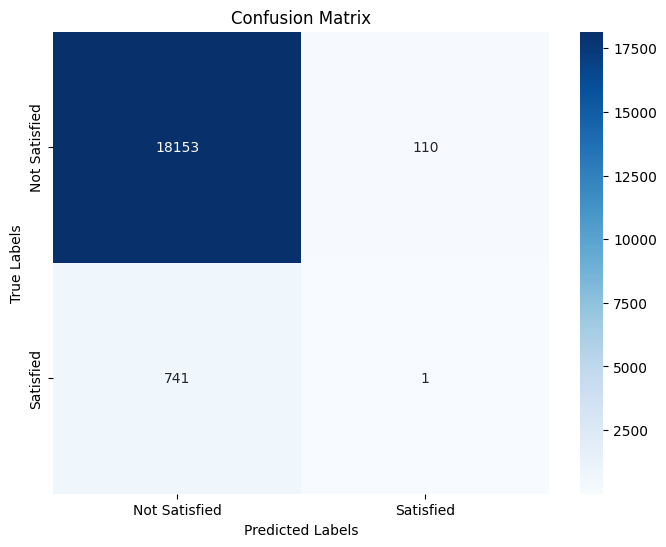

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [53]:
# Métrica AUC
roc_auc_v1 = roc_auc_score(y_teste,y_pred_v1)
print(roc_auc_v1)

0.49766230103343295
